## LIBRERIAS

In [3]:
import numpy as np
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
from torch import nn, optim

import torch.nn.functional as F

## TIPOS DE LETRAS Y ETIQUETAS EN EL DATASET

Un archivo CSV contiene los 10 tipos de letras Kuzushiji que conforman el dataset, junto con el indice que le corresponde a cada una.

In [6]:
labelsCSV = pd.read_csv('../input/kuzushiji/kmnist_classmap.csv', delimiter=',', nrows = 100)
labelsCSV.dataframeName = '../input/kuzushiji/kmnist_classmap.csv'
nRow, nCol = labelsCSV.shape
print(labelsCSV)
print('\nHay', nRow, 'filas y', nCol, 'columnas')

FileNotFoundError: [Errno 2] No such file or directory: '../input/kuzushiji/kmnist_classmap.csv'

## DATASET DE ENTRENAMIENTO TRAIN Y PRUEBA TEST
Los archivos kmist-train-img.npz y kmnist-train-labels.npz contienen las imagenes y etiquetas de entrenamiento. Los archivos kmist-test-img.npz y kmnist-test-labels.npz contienen las imagenes y etiquetas de prueba 

In [3]:
X_train = np.load('../input/kuzushiji/kmnist-train-imgs.npz')['arr_0'] #IMAGENES DE ENTRENAMIENTO
Y_train = np.load('../input/kuzushiji/kmnist-train-labels.npz')['arr_0'] #ETIQUETAS DE LAS IMAGENES

X_test = np.load('../input/kuzushiji/kmnist-test-imgs.npz')['arr_0'] #IMAGENES PARA PROBAR EL MODELO
Y_test = np.load('../input/kuzushiji/kmnist-test-labels.npz')['arr_0'] #ETIQUETAS DE LAS IMAGENES DE PRUEBA

**Conociendo las distribuciones de los datos:**

El **TRAIN DATASET** contiene 60.000 imagenes, 10.000 imagenes por cada una de los 10 tipos de letras.   El **TEST DATASET** contiene 10.000 imagenes, 1.000 imagenes por cada una de los 10 tipos de letras. 

Text(0.5, 1.0, 'TEST DATASET')

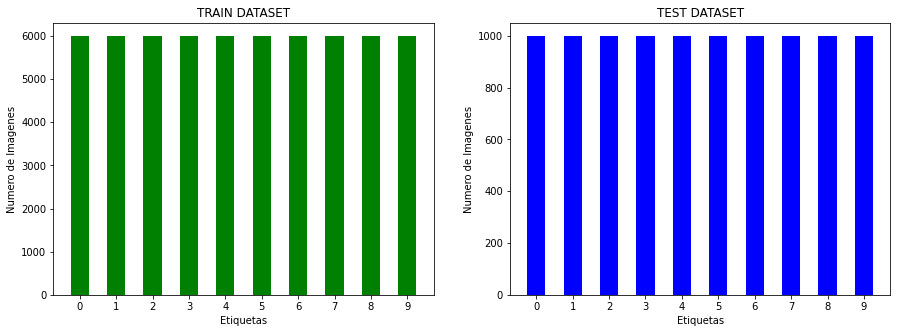

In [4]:
train_labels, train_counts = np.unique(Y_train, return_counts=True)
test_labels, test_counts = np.unique(Y_test, return_counts=True)

fig, (ax1, ax2) = plt.subplots(figsize=(15,5), ncols=2)
ax1.bar(train_labels, train_counts, 2/4, color="green"); 
ax1.set(xticks=train_labels)
ax1.set(xlabel='Etiquetas', ylabel='Numero de Imagenes')
ax1.set_title('TRAIN DATASET')

ax2.bar(test_labels, test_counts, 2/4, color="blue"); 
ax2.set(xticks=test_labels)
ax2.set(xlabel='Etiquetas', ylabel='Numero de Imagenes')
ax2.set_title('TEST DATASET')

In [5]:
def normalizar(img, respu):
    img = img.astype(np.float32)
    img = img/255.0 #normalizacion
    img = np.reshape(img, (len(img), 1, 28, 28))
    img = torch.Tensor(img)
    respu = respu.astype('int64')
    respu = torch.Tensor(respu).type(torch.LongTensor)
    
    return img, respu

X_train, Y_train = normalizar(X_train, Y_train) #NORMALIZACION DE LAS IMAGENES TRAIN
X_test, Y_test = normalizar(X_test, Y_test) #NORMALIZACION DE LAS IMAGENES TEST

In [6]:
torch.manual_seed(0)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size = 0.05,  random_state=1) #Se crea el conjunto de validacion, 10% del conjunto de entrenamiento

dataset_train = torch.utils.data.TensorDataset(X_train, Y_train) #DATASET DE ENTRENAMEINTO IMAGENES + ETIQUETAS
trainloader = torch.utils.data.DataLoader(dataset_train, batch_size = 128, shuffle = False) #DIVICION DEL DATASET EN BATCH DE 128=2^7

dataset_test = torch.utils.data.TensorDataset(X_test, Y_test) #DATASET DE PRUEBAS IMAGENES + ETIQUETAS
testloader = torch.utils.data.DataLoader(dataset_test, batch_size = 128, shuffle = False)

dataset_dev = torch.utils.data.TensorDataset(X_dev, Y_dev) #DATASET DE PRUEBAS IMAGENES + ETIQUETAS
devloader = torch.utils.data.DataLoader(dataset_dev, batch_size = 128, shuffle = False)

print ("Numero de imagenes de ENTRENAMIENTO: " + str(X_train.shape[0]))
print ("Numero de imagenes de VALIDACIÓN: " + str(X_dev.shape[0]))
print ("Numero de imagenes de PRUEBA: " + str(X_test.shape[0]))
print ("Tamaño de las imagenes: " + str(X_train.shape[2]) + "px , " + str(X_train.shape[2]) + "px, 1 capa")
print ("Dimenciones de X_train: " + str(X_train.shape))
print ("Dimenciones de Y_train: " + str(Y_train.shape))
print ("Dimenciones de X_dev: " + str(X_dev.shape))
print ("Dimenciones de Y_dev: " + str(Y_dev.shape))
print ("Dimenciones de X_test: " + str(X_test.shape))
print ("Dimenciones de Y_test: " + str(Y_test.shape))

Numero de imagenes de ENTRENAMIENTO: 57000
Numero de imagenes de VALIDACIÓN: 3000
Numero de imagenes de PRUEBA: 10000
Tamaño de las imagenes: 28px , 28px, 1 capa
Dimenciones de X_train: torch.Size([57000, 1, 28, 28])
Dimenciones de Y_train: torch.Size([57000])
Dimenciones de X_dev: torch.Size([3000, 1, 28, 28])
Dimenciones de Y_dev: torch.Size([3000])
Dimenciones de X_test: torch.Size([10000, 1, 28, 28])
Dimenciones de Y_test: torch.Size([10000])


**ALGUNAS IMAGENES DE ENTRENAMIENT0**

Text(0.5, 1.0, 'Imagen de ejemplo =14\n Etiqueta = 7')

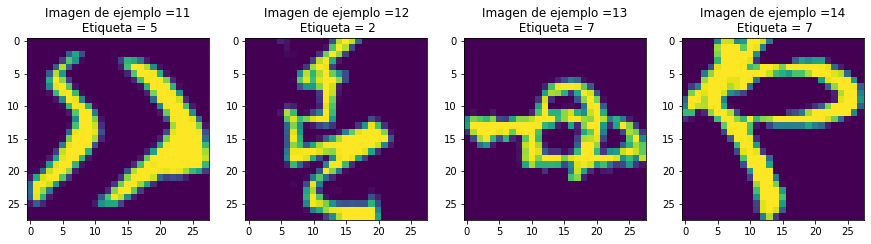

In [7]:
imagen, etiqueta = next(iter(trainloader))
index=11

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(15,5), ncols=4)

ax1.imshow(imagen[index][0])
ax1.set_title("Imagen de ejemplo =" + str(index) +"\n Etiqueta = "+ str((int(etiqueta[index]))))
ax2.imshow(imagen[index+1][0])
ax2.set_title("Imagen de ejemplo =" + str(index+1) +"\n Etiqueta = "+ str((int(etiqueta[index+1]))))
ax3.imshow(imagen[index+2][0])
ax3.set_title("Imagen de ejemplo =" + str(index+2) +"\n Etiqueta = "+ str((int(etiqueta[index+2]))))
ax4.imshow(imagen[index+3][0])
ax4.set_title("Imagen de ejemplo =" + str(index+3) +"\n Etiqueta = "+ str((int(etiqueta[index+3]))))

## CREACIÓN DE LA RED

In [8]:
class Classifier(nn.Module):
    def __init__(self, modelo):
        super().__init__()
        self.modelo = modelo
        torch.manual_seed(2)
        
        if self.modelo == 1: #MODELO DE R.N.A.
            self.fc1 = nn.Linear(784, 128) #Capa Entrada 784=(28px*28px*1) CONECTADA 1era Capa Oculta 128 neuronas
            self.fc2 = nn.Linear(128, 64)  #1era Capa Oculta 128 CONECTADA 2da Capa Oculta 64 neuronas
            self.fc3 = nn.Linear(64, 10)   #2da Capa Oculta 64 CONECTADA Capa de salida de 10 neuronas (10 tipos de letras)
        
        if self.modelo == 2: # 1er MODELO R.N.C
            self.layer1 = nn.Sequential( # input=(128*1*28*28)
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0), # output = (128*6*24*24)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # output = (128*6*12*12)
            nn.Dropout(p=0.2))
        
            self.fc1 = nn.Linear(864, 512)
            self.fc2 = nn.Linear(512, 64)
            self.fc3 = nn.Linear(64, 10)
            
        if self.modelo == 3: # 2do MODELO R.N.C
            self.layer1 = nn.Sequential( # input=(128*1*28*28)
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2), # output = (128*6*28*28)
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # output = (32*6*14*14)
            nn.Dropout(p=0.1)) #nn.Dropout(p=0.2) 
            
            self.layer2 = nn.Sequential(
            nn.Conv2d(6, 12, kernel_size=4, stride=1, padding=0), # output = (128*12*11*11) 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), # output = (128*12*5*5)
            nn.Dropout(p=0.1))
            
            self.fc1 = nn.Linear(300, 512) #pading 0 (192,512)
            self.fc2 = nn.Linear(512, 64)
            self.fc3 = nn.Linear(64, 10)
        
        if self.modelo == 4: # 3do MODELO R.N.C
            self.layer1 = nn.Sequential( # input=(128*1*28*28)
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2), # output = (128*6*28*28)
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # output = (128*6*14*14)
            nn.Dropout(p=0.1)) 
            
            self.layer2 = nn.Sequential(
            nn.Conv2d(6, 12, kernel_size=3, stride=1, padding=1), # output = (128*12*14*14) 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # output = (128*12*7*7)
            nn.Dropout(p=0.1)) 
            
            self.layer3 = nn.Sequential(
            nn.Conv2d(12, 24, kernel_size=2, stride=1, padding=0), # output = (128*24*6*6) 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # output = (128*24*3*3)
            nn.Dropout(p=0.1))
            
            self.fc1 = nn.Linear(216, 512)
            self.fc2 = nn.Linear(512, 64)
            self.fc3 = nn.Linear(64, 10)
            
    def forward(self, x):
        if self.modelo == 1:
            x = x.view(x.shape[0], -1) # aplanar las imagenes en vectores
            
            l1 = F.relu(self.fc1(x)) #relu para la primera capa oculta
            #l1 = F.dropout(l1, p=0.2)
            l2 = F.relu(self.fc2(l1)) #relu para la segunda capa oculta
            #l2 = F.dropout(l2, p=0.2)
            predic = F.log_softmax(self.fc3(l2), dim=1) #softmax porque necesitamos que sean multiclase la salida
            
            return predic
        
        if self.modelo == 2:
            l1 = self.layer1(x)
        
            x = l1.view(l1.shape[0], -1)
        
            l1fc = F.relu(self.fc1(x))
            l2fc = F.relu(self.fc2(l1fc))
            predic = F.softmax(self.fc3(l2fc), dim=1)
        
            return predic
        
        if self.modelo == 3:
            l1 = self.layer1(x)
            l2 = self.layer2(l1)
            
            x = l2.view(l2.shape[0], -1)
            
            l1fc = F.relu(self.fc1(x))
            l2fc = F.relu(self.fc2(l1fc))
            predic = F.softmax(self.fc3(l2fc), dim=1)
            
            return predic
        
        if self.modelo == 4:
            l1 = self.layer1(x)
            l2 = self.layer2(l1)
            l3 = self.layer3(l2)
            
            x = l3.view(l3.shape[0], -1)
            
            l1fc = F.relu(self.fc1(x))
            l2fc = F.relu(self.fc2(l1fc))
            predic = F.softmax(self.fc3(l2fc), dim=1)
            
            return predic

## ENTRENAMIENTO DEL MODELO 

In [9]:
def entrenamiento(model, criterion, optimizer, epocas, tloader, dloader, lentrainds, lentestds):
    
    train_lost_array = []
    train_accuracy_array = []
    dev_lost_array = []
    dev_accuracy_array = []
    
    for e in range(epocas):
        model.train() #Cambiar a modo entrenamiento
        train_loss = 0
        accuracy = 0
        steps = 0
        
        for i, (image, label) in enumerate(tloader):
            y_techo = model(image)
            loss = criterion(y_techo, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(y_techo, 1)
            accuracy += (predicted == label).sum()
            steps += 1
            
        train_lost_array.append(train_loss/steps)
        train_accuracy_array.append(100 * accuracy//lentrainds)
        
        model.eval()
        with torch.no_grad():
            iter_loss = 0
            accuracy = 0
            steps = 0
            
            for i, (images, labels) in enumerate(devloader):
                outputs = model(images)
                loss = criterion(outputs, labels)

                iter_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                accuracy += (predicted == labels).sum()
                steps += 1
            
            dev_lost_array.append(iter_loss/steps)
            dev_accuracy_array.append(100 * accuracy/lentestds)
            
        print ('Epocas {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.2f}%, Validation Loss: {:.3f}, Validation Acc: {:.2f}%'.format(e+1, epocas, train_lost_array[-1], train_accuracy_array[-1], dev_lost_array[-1], dev_accuracy_array[-1]))
                
    return train_lost_array, train_accuracy_array, dev_lost_array, dev_accuracy_array

**RESULTADOS DEL ENTRENAMIENTO**

Epocas 1/24, Training Loss: 1.800, Training Accuracy: 66.00%, Validation Loss: 1.724, Validation Acc: 74.00%
Epocas 2/24, Training Loss: 1.691, Training Accuracy: 77.00%, Validation Loss: 1.668, Validation Acc: 79.40%
Epocas 3/24, Training Loss: 1.621, Training Accuracy: 84.00%, Validation Loss: 1.560, Validation Acc: 90.33%
Epocas 4/24, Training Loss: 1.564, Training Accuracy: 89.00%, Validation Loss: 1.546, Validation Acc: 91.73%
Epocas 5/24, Training Loss: 1.556, Training Accuracy: 90.00%, Validation Loss: 1.542, Validation Acc: 92.10%
Epocas 6/24, Training Loss: 1.546, Training Accuracy: 91.00%, Validation Loss: 1.525, Validation Acc: 93.83%
Epocas 7/24, Training Loss: 1.540, Training Accuracy: 92.00%, Validation Loss: 1.530, Validation Acc: 93.27%
Epocas 8/24, Training Loss: 1.514, Training Accuracy: 94.00%, Validation Loss: 1.506, Validation Acc: 95.67%
Epocas 9/24, Training Loss: 1.507, Training Accuracy: 95.00%, Validation Loss: 1.504, Validation Acc: 95.77%
Epocas 10/24, Train

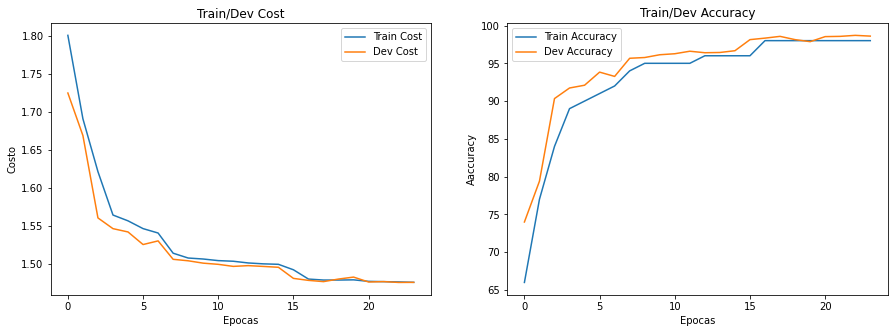

In [10]:
#PARAMETROS DEL MODELO
choseModelo = 3 # Ek modelo 3 resulto tener el mejor rendimiento
model = Classifier(choseModelo)
criterion = nn.CrossEntropyLoss() #nn.NLLLoss() nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
epocas = 24

train_lost_array, train_accuracy_array, dev_lost_array, dev_accuracy_array= entrenamiento(model, criterion, optimizer, epocas, trainloader, devloader, len(dataset_train), len(dataset_dev))

fig, (ax1, ax2) = plt.subplots(figsize=(15,5), ncols=2)
ax1.plot(train_lost_array, label='Train Cost')
ax1.plot(dev_lost_array, label='Dev Cost')
ax1.set_title('Train/Dev Cost')
ax1.set(xlabel='Epocas', ylabel='Costo')
ax1.legend()

ax2.plot(train_accuracy_array, label='Train Accuracy')
ax2.plot(dev_accuracy_array, label='Dev Accuracy')
ax2.set_title('Train/Dev Accuracy')
ax2.set(xlabel='Epocas', ylabel='Aaccuracy')
ax2.legend()

**RESUMEN DEL MODELO UTILIZADO**

In [11]:
#MODELO UTILIZADO
print(model)

Classifier(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.1, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.1, inplace=False)
  )
  (fc1): Linear(in_features=300, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


**PROBANDO EL MODELO CON UNA IMAGEN DEL SET DE ENTRENAMIENTO**


In [12]:
def pintar(img, ps, lab):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(8,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.set_title("Imagen de ejemplo =" + str(index) +"\n Etiqueta = "+ str((int(lab))))
    ax1.axis('on')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Probabilidad')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    
    print(labelsCSV)

   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を

Prediccion Correcta! el verdadero valor es 2 y la prediccion fue 2



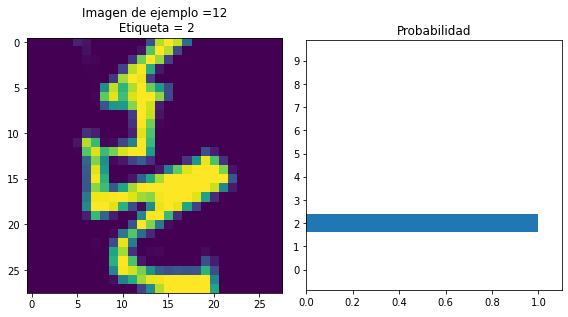

In [13]:
%matplotlib inline

index=12

dataiter = iter(trainloader)
images, labels = dataiter.next()
img = images[index]
lab = labels[index]

img = img.resize_(1, 1, 28, 28) # Aplanado de la imagen

model.eval()
if choseModelo == 1 :
    ps = torch.exp(model(img))
else:
    ps=model(img)

# Plot the image and probabilities
pintar(img.resize_(1, 28, 28), ps, lab)

if (torch.argmax(ps) == lab):
    print("\nPrediccion Correcta! el verdadero valor es " +str(int(lab))+" y la prediccion fue "+str(int(torch.argmax(ps))) +"\n")
else:
    print("\nPrediccion Incorrecta!! el verdadero valor es " +str(int(lab))+" y la prediccion fue "+str(int(torch.argmax(ps))) +"\n")

## PREDICCIONES DEL MODELO CON EL TESTSET

In [14]:
model.eval() #Cambiar a modo evaluacion

test_lost_array=[]
test_accuracy_array=[]

with torch.no_grad():
    accuracy = 0
    total = 0
    test_loss = 0

    for images, labels in testloader:
        y_techo = model(images)
        loss = criterion(y_techo, labels)

        test_loss += loss.item()
        test_loss = test_loss/len(testloader)
        _, predicted = torch.max(y_techo, 1)
        total += labels.size(0)
        accuracy += (predicted == labels).sum().item()
        test_accuracy = (100*accuracy)/total

    test_lost_array.append(test_loss)
    test_accuracy_array.append(test_accuracy)
    print(f'test loss: {test_loss:.3f}, test accuracy: {(100*accuracy)/total:.2f}%')

test loss: 0.021, test accuracy: 95.09%


**PROBANDO EL MODELO CON UNA IMAGEN DEL SET DE PRUEBA**

   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を

Prediccion Correcta! el verdadero valor es 1 y la prediccion fue 1



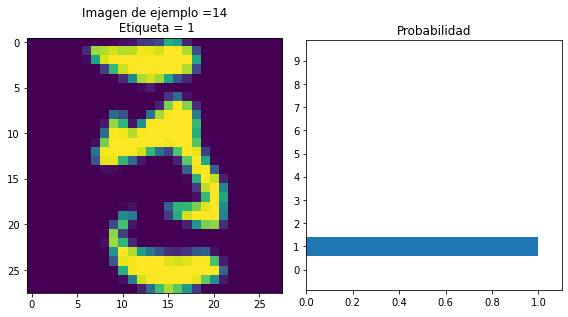

In [15]:
%matplotlib inline
  
index=14

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[index]
lab = labels[index]

img = img.resize_(1, 1, 28, 28) # Aplanado de la imagen

model.eval()
if choseModelo == 1 :
    ps = torch.exp(model(img))
else:
    ps=model(img)

pintar(img.resize_(1, 28, 28), ps, lab)

if (torch.argmax(ps) == lab):
    print("\nPrediccion Correcta! el verdadero valor es " +str(int(lab))+" y la prediccion fue "+str(int(torch.argmax(ps))) +"\n")
else:
    print("\nPrediccion Incorrecta!! el verdadero valor es " +str(int(lab))+" y la prediccion fue "+str(int(torch.argmax(ps))) +"\n")